In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date, datetime

In [4]:
df = pd.read_csv("SCOM08.csv", skipinitialspace=True)

# CLEANING DATA
# Reverse dataframe starting with earliest stock as first index
df = df.iloc[::-1]
# Drop reversed index and add default integer index
df = df.reset_index()
df = df.drop('index', axis=1)

# # Convert date column to standard date format
for idx, row in df.iterrows():
    row.Date = datetime.strptime(row.Date, '%m/%d/%y').date()
    # row.Date = row.Date.strftime("%Y-%m-%d")
    df.at[idx,"Date"] = row.Date

df

,Date,Open,High,Low,Close,Volume
0,2008-06-09,7.35,7.35,7.35,7.35,416383094
1,2008-06-10,6.95,6.95,6.95,6.95,127305797
2,2008-06-11,7.00,7.00,7.00,7.00,183494797
3,2008-06-12,7.35,7.35,7.35,7.35,131243703
4,2008-06-13,7.35,7.45,7.45,7.45,250901500
...,...,...,...,...,...,...
3768,2023-07-03,17.60,18.00,17.60,17.75,467500
3769,2023-07-04,18.00,18.00,17.60,17.80,15905700
3770,2023-07-05,17.90,17.90,17.60,17.70,2346400
3771,2023-07-06,17.80,18.45,17.60,17.85,18260100


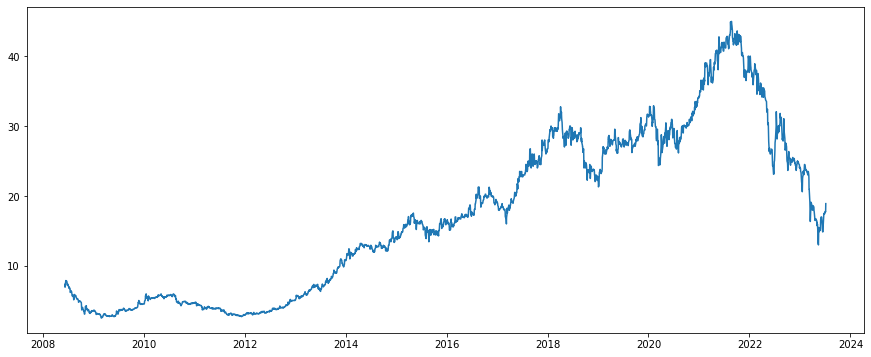

In [5]:
# CLOSING PRICE GRAPH OVER TIME
plt.figure(figsize=(15,6))
plt.plot(df.Date, df.Close)

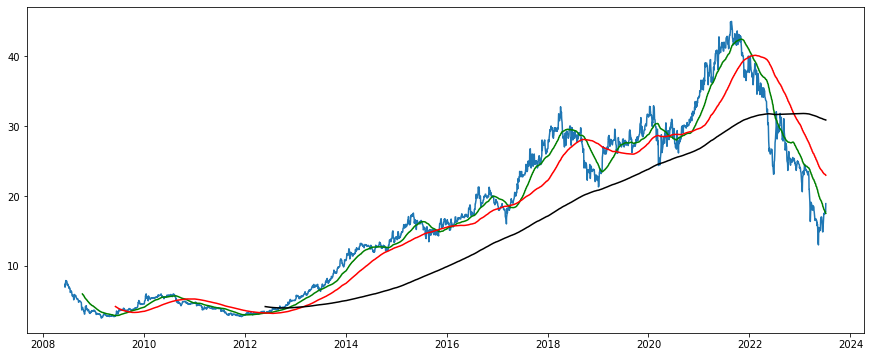

In [6]:
# MOVING AVERAGES
# Mean for a specified period of time
# e.g [90, 250, 1000] 3 Months, 1 Year or 4 years
ma90 = df.Close.rolling(90).mean()
ma250 = df.Close.rolling(250).mean()
ma1000 = df.Close.rolling(1000).mean()

plt.figure(figsize=(15,6))
plt.plot(df.Date, df.Close)
# plt.plot(df.Date, ma2, "g")
plt.plot(df.Date, ma90, "g")
plt.plot(df.Date, ma250, "r")
plt.plot(df.Date, ma1000, "black")

In [7]:
# Split data into train and test
# 70% training data and 30% testing data
data_train = pd.DataFrame(df["Close"][0 : int(len(df) * 0.70)])
data_test = pd.DataFrame(df["Close"][int(len(df) * 0.70) : int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2641, 1)
(1132, 1)


In [8]:
data_train

,Close
0,7.35
1,6.95
2,7.00
3,7.35
4,7.45
...,...
2636,22.90
2637,23.00
2638,23.00
2639,22.90


In [9]:
data_test

,Close
2641,22.30
2642,22.60
2643,22.60
2644,22.85
2645,22.20
...,...
3768,17.75
3769,17.80
3770,17.70
3771,17.85


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train_array = scaler.fit_transform(data_train)
data_train_array.shape[0]

2641

In [12]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i - 100: i])
    y_train.append(data_train_array[i, 0])
    
# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(2541, 100, 1)
(2541,)


In [13]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [14]:
model = Sequential()

# First layer
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second layer
model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

# Third layer
model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

# Fourth layer
model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

# Connect all layers
model.add(Dense(units=1))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [14]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
2541/2541 [==============================] - 33s 13ms/step - loss: 0.0276
Epoch 2/50
2541/2541 [==============================] - 31s 12ms/step - loss: 0.0081
Epoch 3/50
2541/2541 [==============================] - 28s 11ms/step - loss: 0.0063
Epoch 4/50
2541/2541 [==============================] - 29s 11ms/step - loss: 0.0047
Epoch 5/50
2541/2541 [==============================] - 30s 12ms/step - loss: 0.0056
Epoch 6/50
2541/2541 [==============================] - 28s 11ms/step - loss: 0.0048
Epoch 7/50
2541/2541 [==============================] - 31s 12ms/step - loss: 0.0045
Epoch 8/50
2541/2541 [==============================] - 28s 11ms/step - loss: 0.0051
Epoch 9/50
2541/2541 [==============================] - 31s 12ms/step - loss: 0.0041
Epoch 10/50
2541/2541 [==============================] - 35s 14ms/step - loss: 0.0044
Epoch 11/50
2541/2541 [==============================] - 30s 12ms/step - loss: 0.0046
Epoch 12/50
2541/2541 [==============================] - 32s 1

In [16]:
model.save("saf1Model")

In [17]:
data_train.tail(100)

,Close
2541,28.00
2542,27.75
2543,28.00
2544,28.00
2545,28.00
...,...
2636,22.90
2637,23.00
2638,23.00
2639,22.90


In [16]:
# Load Model
from keras.models import load_model
model = load_model("saf1Model")

# Append the past 100 days to testing data
past_100_days = data_train.tail(100)
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

# Scale down testing data
scaler = MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(final_df)
# print(input_data.shape)
# print(input_data)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])
    
# Convert to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)
print()
print(x_test.shape)
print(x_test)
# print(y_test.shape)


(1132, 100, 1)
[[[0.46948357]
  [0.46165884]
  [0.46948357]
  ...
  [0.31298905]
  [0.30985915]
  [0.29577465]]

 [[0.46165884]
  [0.46948357]
  [0.46948357]
  ...
  [0.30985915]
  [0.29577465]
  [0.29107981]]

 [[0.46948357]
  [0.46948357]
  [0.46948357]
  ...
  [0.29577465]
  [0.29107981]
  [0.30046948]]

 ...

 [[0.34428795]
  [0.34428795]
  [0.34741784]
  ...
  [0.14084507]
  [0.1486698 ]
  [0.15023474]]

 [[0.34428795]
  [0.34741784]
  [0.34115806]
  ...
  [0.1486698 ]
  [0.15023474]
  [0.14710485]]

 [[0.34741784]
  [0.34115806]
  [0.33646322]
  ...
  [0.15023474]
  [0.14710485]
  [0.15179969]]]


Original
            Date  Close
0     2018-12-21  22.30
1     2018-12-24  22.60
2     2018-12-27  22.60
3     2018-12-28  22.85
4     2018-12-31  22.20
...          ...    ...
1127  2023-07-03  17.75
1128  2023-07-04  17.80
1129  2023-07-05  17.70
1130  2023-07-06  17.85
1131  2023-07-07  18.90

[1132 rows x 2 columns]
Predicted
            Date      Close
0     2018-12-21  23.253738
1     2018-12-24  23.244583
2     2018-12-27  23.235025
3     2018-12-28  23.225212
4     2018-12-31  23.215631
...          ...        ...
1127  2023-07-03  17.297380
1128  2023-07-04  17.344366
1129  2023-07-05  17.395538
1130  2023-07-06  17.450943
1131  2023-07-07  17.510452

[1132 rows x 2 columns]


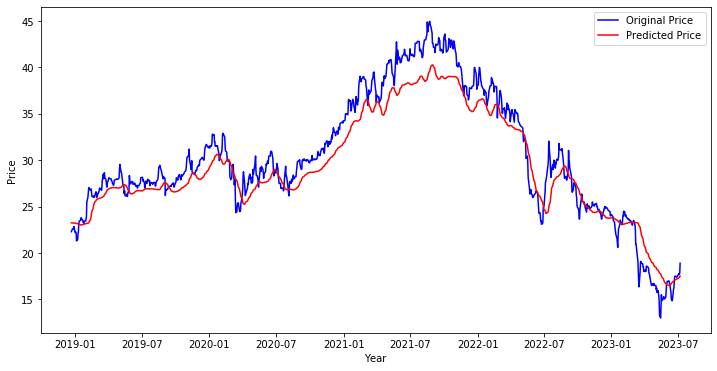

In [17]:
# Making Predictions
y_predicted = model.predict(x_test)

_scaler = scaler.scale_ # 0.03129890453834115
# Scale up
scale_factor = 1/_scaler[0]
y_predicted = (y_predicted * scale_factor) + 13
y_test = (y_test * scale_factor) + 13

# Create a dataframe
data = {
  "Date": [],
  "Close": []
}

j = len(df)
j = j - y_test.shape[0]
predicted = pd.DataFrame(data)
original = pd.DataFrame(data)
for i in range(0, y_test.shape[0]):
    original.at[i, "Date"] = df.loc[j, 'Date']
    original.at[i, "Close"] = y_test[i]
    predicted.at[i, "Date"] = df.loc[j, 'Date']
    predicted.at[i, "Close"] = y_predicted[i]
    j += 1

print("Original")
print(original)
print("Predicted")
print(predicted)
    
plt.figure(figsize=(12,6))
plt.plot(original.Date, original.Close, "b", label="Original Price")
plt.plot(predicted.Date, predicted.Close, "r", label="Predicted Price")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [18]:
# Get the last 100 days
future_inp = data_test[len(data_test)-100:]
future_inp_arr = scaler.fit_transform(future_inp)
fut_inp = future_inp_arr.reshape(1,-1)
fut_inp.shape

(1, 100)

In [19]:
#Creating list of the last 100 data
tmp_inp = list(fut_inp)
tmp_inp = tmp_inp[0].tolist()
len(tmp_inp)

100

In [20]:
# Predicting next 30 days price using the current data
# It will predict in sliding window manner (algorithm) with stride 1

lst_output = []
n_steps = 100
i = 0

while(i < 30):
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.3210248649120331], [0.33372384309768677], [0.34542304277420044], [0.35539621114730835], [0.3633613586425781], [0.36924707889556885], [0.37308430671691895], [0.3750940263271332], [0.3756113648414612], [0.3750002384185791], [0.3735990524291992], [0.3716917037963867], [0.3694981038570404], [0.36716940999031067], [0.36480051279067993], [0.3624468445777893], [0.36013686656951904], [0.35787951946258545], [0.3556722402572632], [0.35351064801216125], [0.3513915240764618], [0.3493139445781708], [0.3472791910171509], [0.34528782963752747], [0.343344509601593], [0.34145715832710266], [0.3396330773830414], [0.3378846347332001], [0.336225301027298], [0.3346652090549469]]


In [21]:
len(lst_output)

30

In [22]:
# Scale up
lst_output = scaler.inverse_transform(lst_output)

In [23]:
lst_output

array([[16.49917103],
       [16.63758989],
       [16.76511117],
       [16.8738187 ],
       [16.96063881],
       [17.02479316],
       [17.06661894],
       [17.08852489],
       [17.09416388],
       [17.0875026 ],
       [17.07222967],
       [17.05143957],
       [17.02752933],
       [17.00214657],
       [16.97632559],
       [16.95067061],
       [16.92549185],
       [16.90088676],
       [16.87682742],
       [16.85326606],
       [16.83016761],
       [16.807522  ],
       [16.78534318],
       [16.76363734],
       [16.74245515],
       [16.72188303],
       [16.70200054],
       [16.68294252],
       [16.66485578],
       [16.64785078]])

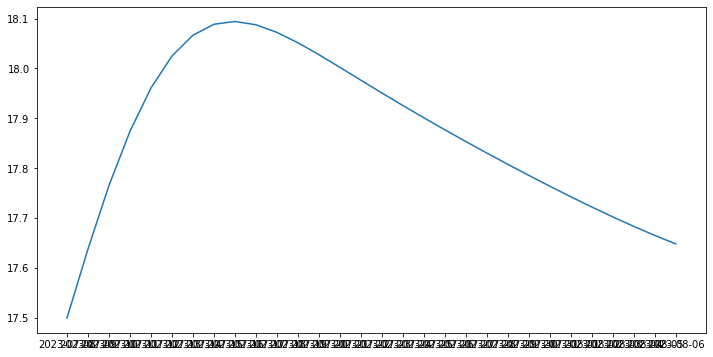

In [24]:
# Create a dataframe
import datetime as dtm
data = {
  "Date": [],
  "Close": []
}

j = len(df)
j = j - y_test.shape[0]
next_n_days = pd.DataFrame(data)
today = "2023-07-07"
today = dtm.datetime.strptime(today, "%Y-%m-%d")
for i in range(len(lst_output)):
    tomorrow = today + dtm.timedelta(days=1)
    tomorrow = tomorrow.strftime("%Y-%m-%d")
    next_n_days.at[i, "Date"] = tomorrow
    next_n_days.at[i, "Close"] = lst_output[i] + 1
    today = tomorrow
    today = dtm.datetime.strptime(today, "%Y-%m-%d")
    
plt.figure(figsize=(12,6))
plt.plot(next_n_days.Date, next_n_days.Close)

In [25]:
original

,Date,Close
0,2018-12-21,22.30
1,2018-12-24,22.60
2,2018-12-27,22.60
3,2018-12-28,22.85
4,2018-12-31,22.20
...,...,...
1127,2023-07-03,17.75
1128,2023-07-04,17.80
1129,2023-07-05,17.70
1130,2023-07-06,17.85


In [28]:
next_n_days

,Date,Close
0,2023-07-08,17.499171
1,2023-07-09,17.637590
2,2023-07-10,17.765111
3,2023-07-11,17.873819
4,2023-07-12,17.960639
5,2023-07-13,18.024793
6,2023-07-14,18.066619
7,2023-07-15,18.088525
8,2023-07-16,18.094164
9,2023-07-17,18.087503


ConversionError: Failed to convert value(s) to axis units: array([datetime.date(2018, 12, 21), datetime.date(2018, 12, 24),
       datetime.date(2018, 12, 27), ..., '2023-08-04', '2023-08-05',
       '2023-08-06'], dtype=object)

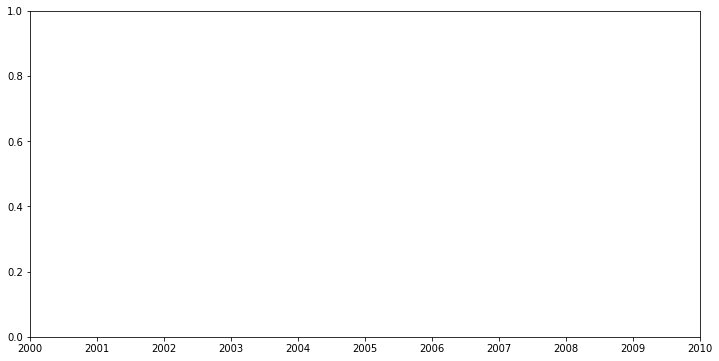

In [29]:
combined = pd.concat([original, next_n_days])
combined_2 = pd.concat([predicted, next_n_days])

plt.figure(figsize=(12,6))
plt.plot(combined.Date, combined.Close, "b", label="Original Price")
plt.plot(predicted.Date, predicted.Close, "r", label="Predicted Price")
# plt.plot(next_n_days.Date, next_n_days.Close, "g", label="Next 30 Days")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

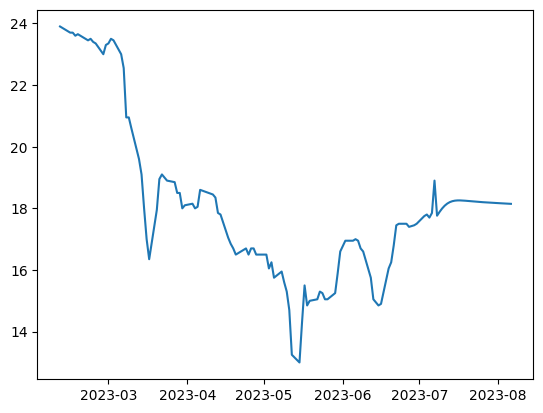

In [68]:
# The last n days, where n = 100
prev_n_days = pd.concat([original[len(original)-100:], next_n_days])
plt.plot(prev_n_days.Date, prev_n_days.Close)

In [106]:
prev_n_days

,Date,Close
1032,2023-02-10,23.900000
1033,2023-02-13,23.750000
1034,2023-02-14,23.700000
1035,2023-02-15,23.700000
1036,2023-02-16,23.600000
...,...,...
25,2023-08-02,17.164669
26,2023-08-03,17.159982
27,2023-08-04,17.155325
28,2023-08-05,17.150696
